In [1]:
import os

import aircraft_detector.ego_noise_prediction.prediction as enp
from aircraft_detector.utils.plot_helper import plot_training_history

# assign root directory
root_directory = os.path.join(os.pardir, os.pardir, os.pardir, 'Data')
# settings for feature extraction
feature_settings = {'feature': 'Mel'}
states_settings = {"states": [
            "rpm",
]}

In [2]:
predictor = enp.EgoNoisePredictor(
    root_directory,
    feature_settings,
    states_settings
)
predictor.load_datasets()
predictor.super_verbose = True

Device: cuda.
Number of trainable parameters in network: 6560.
epoch 1: training loss = 0.011283, validation loss = 0.001940
Validation loss decreased (inf --> 0.001940).  Saving model ...
epoch 2: training loss = 0.001840, validation loss = 0.001870
Validation loss decreased (0.001940 --> 0.001870).  Saving model ...
epoch 3: training loss = 0.001787, validation loss = 0.001841
Validation loss decreased (0.001870 --> 0.001841).  Saving model ...
epoch 4: training loss = 0.001758, validation loss = 0.001826
Validation loss decreased (0.001841 --> 0.001826).  Saving model ...
epoch 5: training loss = 0.001742, validation loss = 0.001809
Validation loss decreased (0.001826 --> 0.001809).  Saving model ...
epoch 6: training loss = 0.001728, validation loss = 0.001792
Validation loss decreased (0.001809 --> 0.001792).  Saving model ...
epoch 7: training loss = 0.001715, validation loss = 0.001784
Validation loss decreased (0.001792 --> 0.001784).  Saving model ...
epoch 8: training loss = 

epoch 62: training loss = 0.001572, validation loss = 0.001658
Validation loss increased (0.001657 --> 0.001658). Counter: 6 out of 25
epoch 63: training loss = 0.001580, validation loss = 0.001695
Validation loss increased (0.001657 --> 0.001695). Counter: 7 out of 25
epoch 64: training loss = 0.001576, validation loss = 0.001674
Validation loss increased (0.001657 --> 0.001674). Counter: 8 out of 25
epoch 65: training loss = 0.001569, validation loss = 0.001670
Validation loss increased (0.001657 --> 0.001670). Counter: 9 out of 25
epoch 66: training loss = 0.001573, validation loss = 0.001670
Validation loss increased (0.001657 --> 0.001670). Counter: 10 out of 25
epoch 67: training loss = 0.001574, validation loss = 0.001664
Validation loss increased (0.001657 --> 0.001664). Counter: 11 out of 25
epoch 68: training loss = 0.001579, validation loss = 0.001656
Validation loss increased (0.001657 --> 0.001656). Counter: 12 out of 25
epoch 69: training loss = 0.001570, validation loss 

epoch 123: training loss = 0.001546, validation loss = 0.001644
Validation loss increased (0.001634 --> 0.001644). Counter: 8 out of 25
epoch 124: training loss = 0.001549, validation loss = 0.001653
Validation loss increased (0.001634 --> 0.001653). Counter: 9 out of 25
epoch 125: training loss = 0.001545, validation loss = 0.001653
Validation loss increased (0.001634 --> 0.001653). Counter: 10 out of 25
epoch 126: training loss = 0.001550, validation loss = 0.001649
Validation loss increased (0.001634 --> 0.001649). Counter: 11 out of 25
epoch 127: training loss = 0.001548, validation loss = 0.001643
Validation loss increased (0.001634 --> 0.001643). Counter: 12 out of 25
epoch 128: training loss = 0.001546, validation loss = 0.001639
Validation loss increased (0.001634 --> 0.001639). Counter: 13 out of 25
epoch 129: training loss = 0.001550, validation loss = 0.001640
Validation loss increased (0.001634 --> 0.001640). Counter: 14 out of 25
epoch 130: training loss = 0.001543, valida

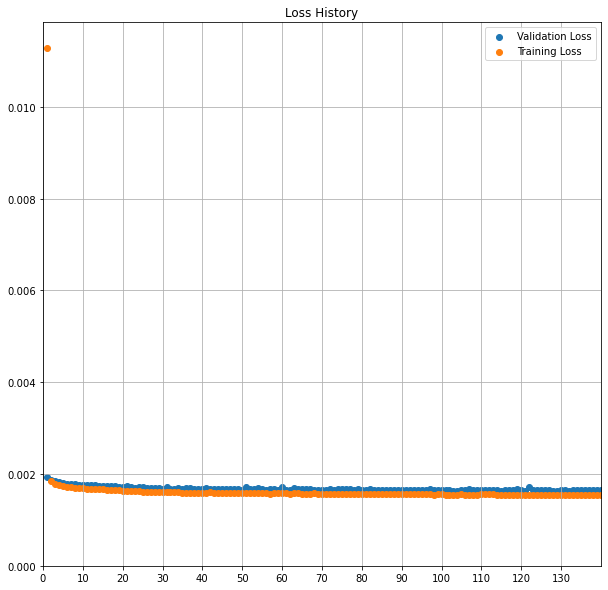

Net(
  (_modules_lin): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=4, out_features=100, bias=True)
      (1): ReLU()
    )
  )
  (_out): Linear(in_features=100, out_features=60, bias=True)
)


In [4]:
config = [
    {'layer_type': 'Linear', 'out_features': 100},
]
predictor.set_net_configuration(config)


optimizer = {'optimizer': 'AdamW', 'lr': 0.002, 'weight_decay': 0.01, 'amsgrad': False}
train_settings = {
                'epochs': 200,
                'es_patience': 25,
                'batch_size': 256,
                'optimizer': optimizer,
                #'random_seed': 42,
            }

# train model
model, training_losses, loss_history = predictor.train_network(train_settings)
val_loss = training_losses[1]  # losses =  [train_losses, val_losses]
# plot training history
plot_training_history(loss_history)
# test model
test_loss = predictor.test_network(model)
print(model)


/home/mark/anaconda3/envs/thesis/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/mark/anaconda3/envs/thesis/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


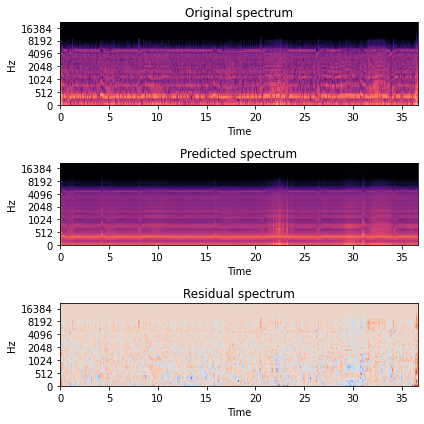

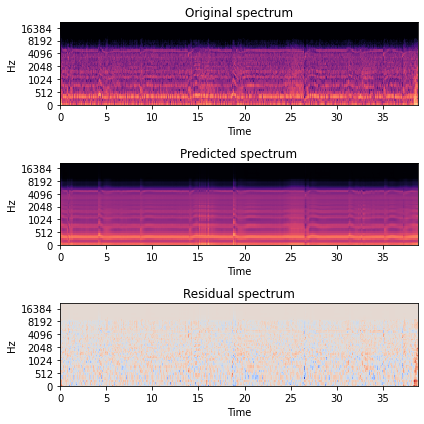

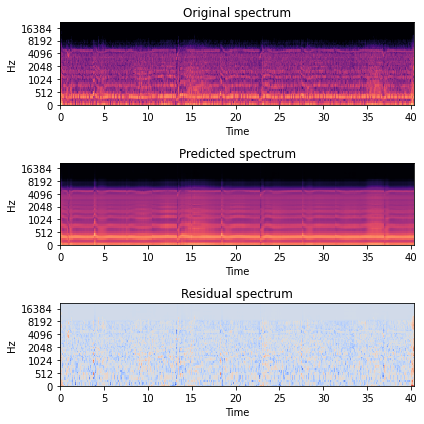

In [6]:
dir_model = predictor.save_network(model, test_loss)
# save the output
predictor.save_network_output(model, dir_model, 'Test', plot=True)

In [18]:
# redo denoised features
import aircraft_detector.aircraft_classification.feature_extraction as fe

extractor = fe.FeatureExtraction(root_directory, feature_settings)

for noise_ratio in [0.25, 0.50, 0.75, 1.00]:
    extractor.create_denoised_test_set(noise_ratio, enp_model_index=-1)

In [20]:
import aircraft_detector.aircraft_classification.classification as cla
classifier = cla.AircraftClassifier(
    root_directory,
    feature_settings
)
model, dir_model = classifier.load_network()


Device: cuda.
Number of trainable parameters in network: 126881.


In [21]:
model

Net(
  (_modules_conv): ModuleList(
    (0): Sequential(
      (0): Conv2d(2, 16, kernel_size=[5, 5], stride=(1, 1), dilation=[2, 2])
      (1): BatchNorm2d(16, eps=1e-08, momentum=0.1, affine=True, track_running_stats=True)
      (2): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
      (3): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(16, 16, kernel_size=[5, 5], stride=(1, 1), dilation=[2, 2])
      (1): BatchNorm2d(16, eps=1e-08, momentum=0.1, affine=True, track_running_stats=True)
      (2): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
      (3): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=[5, 5], stride=(1, 1))
      (1): BatchNorm2d(32, eps=1e-08, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (_modules_lin): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=800, out_features=128, bias=True)
      (1): ReLU()
      (2): 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roct(
    labels, predictions, files=None, fig=None, label=None, color='darkorange'
):
    if fig is None:
        # prepare figure
        fig = plt.figure(figsize=(8, 4))
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.grid()
    
    
    if files is not None:
        # plot the recordings, instead of the segments (files)
        recordings = np.unique(
            ["_".join(os.path.split(f)[-1].split("_")[:2]) for f in files]
        )
        r_labels = []
        r_predictions = []
        for rec in recordings:
            mask = [rec in file for file in files]
            r_labels.append(labels[mask])
            r_predictions.append(np.mean(predictions[mask]))

        fpr, tpr, thresh = roc_curve(np.array(r_labels), np.array(r_predictions))
        auc = roc_auc_score(np.array(r_labels), np.array(r_predictions))

    else:
        fpr, tpr, thresh = roc_curve(labels.to_numpy(), predictions.to_numpy())
        auc = roc_auc_score(labels.to_numpy(), predictions.to_numpy())

    plt_label = " (AUC = %0.3f)" % auc
    if label is not None:
        plt_label = label + plt_label
    plt.plot(fpr, tpr, color=color, lw=2, label=plt_label)
    plt.legend(loc="lower right")

    return fig


def log_accuracy_binary(df):

    # total accuracy (clip)
    n_correct = np.where(df["Label"] == round(df["Predicted"]), 1, 0).sum()
    clip_acc = n_correct / len(df) * 100
    
    categories = df["Category"].unique()
    clip_accs = []
    rec_accs = []
    # log per category (clip)
    for c in categories:
        df_c = df[df["Category"] == c]
        # accuracy per clip
        correct_clip = np.where(df_c["Label"] == round(df_c["Predicted"]), 1, 0).sum()
        clip_accs.append(correct_clip / len(df_c) * 100)
        
        # accuracy per recording
        clips = df_c["Filepath_Spectrum"].to_numpy()
        # get recordings belonging to category
        recordings = np.unique(
            ["_".join(os.path.split(clip)[-1].split("_")[:2]) for clip in clips]
        )
        # check how many recordings are correct
        correct_rec = 0
        for rec in recordings:
            mask = [rec in clip for clip in clips]
            label = df_c["Label"][mask].iloc[0]
            predicted = np.mean(
                df_c["Predicted"][mask]
            )
            correct_rec += int(round(predicted) == label)
        rec_accs.append(correct_rec / len(recordings) * 100)
    
    rec_acc = sum(rec_accs) / 5
    
    acc_list = []
    acc_list.append('%.3g%% (%.3g%%)' % (clip_acc, rec_acc) )
    
    for clip, rec in list(zip(clip_accs, rec_accs)):
        acc_list.append('%.3g%% (%.3g%%)' % (clip, rec))
    
    return acc_list

Split 40 files (5 categories) into 499 files
Split 40 files (5 categories) into 499 files
Accuracy for 'Denoised' with noise ratio = 0.25:
Accuracy for category 'airplane' (clip): 97.12% (101/104), avg. score = 0.92
Accuracy for category 'helicopter' (clip): 84.21% (80/95), avg. score = 0.81
Accuracy for category 'engine' (clip): 100.00% (48/48), avg. score = 0.03
Accuracy for category 'train' (clip): 100.00% (47/47), avg. score = 0.06
Accuracy for category 'wind' (clip): 98.08% (102/104), avg. score = 0.11
Accuracy for label 'aircraft' (clip): 90.95% (181/199), avg. score = 0.87
Accuracy for label 'non-aircraft' (clip): 98.99% (197/199), avg. score = 0.08
Accuracy: 94.97% (378/398)
Accuracy for category 'airplane' (recording): 100.00% (8/8), avg. score = 0.92
Accuracy for category 'helicopter' (recording): 87.50% (7/8), avg. score = 0.82
Accuracy for category 'engine' (recording): 100.00% (8/8), avg. score = 0.03
Accuracy for category 'train' (recording): 100.00% (8/8), avg. score = 0

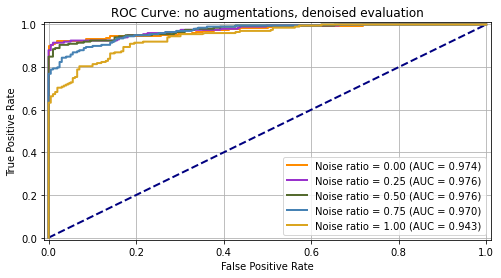

In [23]:
# plot clean test
plt_label = "Noise ratio = 0.00"
classifier.split_features('Test')
df_out = classifier.classify_mismatched_test_set(model)


# test denoised/mixed datasets
import pandas as pd
df_log = pd.DataFrame(
    columns=['Overall', 'Airplane', 'Helicopter', 'Engine', 'Train', 'Wind'],
    index=['Clean', '0.25D', '0.50D', '0.75D', '1.00D', '0.25M', '0.50M', '0.75M', '1.00M']
)

df_log.iloc[0] = pd.Series(log_accuracy_binary(df_out), index=df_log.columns)

augmentation = 'No'
colors = ['darkorchid', 'darkolivegreen', 'steelblue', 'goldenrod']

ctr = 1
for noise_set in ['Denoised']:
    
    # plot noise-free roc
    fig = plot_roct(
        df_out['Label'], df_out['Predicted'], label=plt_label
    )
    plt.title(
        "ROC Curve: %s augmentations, %s evaluation" % (augmentation.lower(), noise_set.lower())
    )
    
    # plot noisy roc
    dfs_mm = []
    for i, noise_ratio in enumerate([0.25, 0.50, 0.75, 1.00]):
        # split evaluation set into segments
        classifier.split_features('Test', noise_set=noise_set, noise_ratio=noise_ratio)
        # evaluate on segments (noisy)    
        df_mm = classifier.classify_mismatched_test_set(model)
        df_log.iloc[ctr] = pd.Series(log_accuracy_binary(df_mm), index=df_log.columns)
        
        print("Accuracy for '%s' with noise ratio = %.2f:" % (noise_set, noise_ratio))
        accuracies = classifier.print_accuracy(df_mm)
        
        plt_label = "Noise ratio = %.2f" % noise_ratio
        plot_roct(
            df_mm['Label'], 
            df_mm['Predicted'],
            fig=fig,
            label=plt_label, 
            color=colors[i]
        )
        dfs_mm.append(df_mm)
        ctr += 1